<a href="https://colab.research.google.com/github/ossamamehmood/MRI-Image-Segmentation-for-Alzheimer-Disease/blob/main/MRI_image_segmentation_on_Alzheimar_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow


import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

Num GPUs Available:  1


In [ ]:
# unzip and load datasets
!unzip "archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory="./Alzheimer_s Dataset/train",
                                                 shuffle=True,
                                                 target_size=(176,208), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory="./Alzheimer_s Dataset/train",
                                                 shuffle=True,
                                                 target_size=(176,208), 
                                                 subset="validation",
                                                 class_mode='categorical')


image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory="./Alzheimer_s Dataset/test",
                                                 shuffle=False,
                                                 target_size=(176,208), 
                                                 class_mode=None)

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


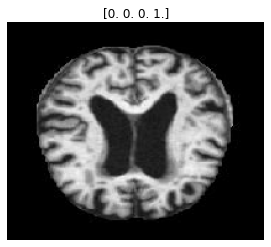

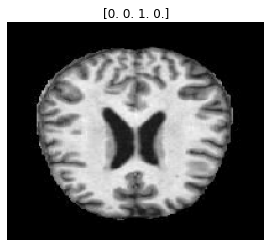

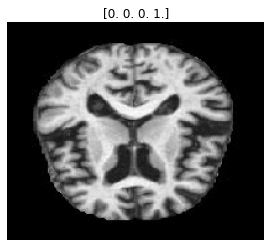

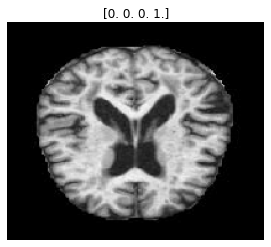

In [ ]:
#show flwoers for the first batch

batch_1_img = train_dataset[0]

for i in range(0,4):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [176,208,3]),                             
keras.layers.Dense(300, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(4, activation = 'softmax')])

model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)
model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

Epoch 1/50
513/513 [==============================] - 11s 16ms/step - loss: 1.5728 - auc: 0.7498 - val_loss: 1.0429 - val_auc: 0.7804
Epoch 2/50
513/513 [==============================] - 8s 15ms/step - loss: 1.0411 - auc: 0.7772 - val_loss: 1.0373 - val_auc: 0.7804
Epoch 3/50
513/513 [==============================] - 8s 15ms/step - loss: 1.0414 - auc: 0.7792 - val_loss: 1.0530 - val_auc: 0.7804
Epoch 4/50
513/513 [==============================] - 8s 15ms/step - loss: 1.0413 - auc: 0.7772 - val_loss: 1.0359 - val_auc: 0.7804
Epoch 5/50
513/513 [==============================] - 8s 15ms/step - loss: 1.0403 - auc: 0.7803 - val_loss: 1.0403 - val_auc: 0.7804
Epoch 6/50
513/513 [==============================] - 8s 15ms/step - loss: 1.0406 - auc: 0.7796 - val_loss: 1.0343 - val_auc: 0.7805
Epoch 7/50
513/513 [==============================] - 8s 15ms/step - loss: 1.0394 - auc: 0.7792 - val_loss: 1.0356 - val_auc: 0.7804
Epoch 8/50
513/513 [==============================] - 8s 15ms/step -

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

128/128 [==============================] - 1s 11ms/step - loss: 1.0349 - auc: 0.7804
Loss:  1.0348820686340332
Accuracy:  0.7803845405578613


In [ ]:
#simple ann with 3 layers 
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [176,208,3]),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(4, activation = 'softmax')])


model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=4,
                                            restore_best_weights=True)

In [ ]:
model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

Epoch 1/50
513/513 [==============================] - 10s 17ms/step - loss: 1.7455 - auc: 0.7393 - val_loss: 1.0450 - val_auc: 0.7804
Epoch 2/50
513/513 [==============================] - 9s 18ms/step - loss: 1.0425 - auc: 0.7766 - val_loss: 1.0373 - val_auc: 0.7804
Epoch 3/50
513/513 [==============================] - 8s 15ms/step - loss: 1.0405 - auc: 0.7795 - val_loss: 1.0347 - val_auc: 0.7804
Epoch 4/50
513/513 [==============================] - 8s 16ms/step - loss: 1.0415 - auc: 0.7775 - val_loss: 1.0344 - val_auc: 0.7804
Epoch 5/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0395 - auc: 0.7804 - val_loss: 1.0359 - val_auc: 0.7804
Epoch 6/50
513/513 [==============================] - 9s 18ms/step - loss: 1.0408 - auc: 0.7778 - val_loss: 1.0372 - val_auc: 0.7804
Epoch 7/50
513/513 [==============================] - 8s 16ms/step - loss: 1.0406 - auc: 0.7782 - val_loss: 1.0405 - val_auc: 0.7804
Epoch 8/50
513/513 [==============================] - 8s 16ms/step -

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

128/128 [==============================] - 1s 11ms/step - loss: 1.0344 - auc: 0.7804
Loss:  1.0344475507736206
Accuracy:  0.7803845405578613


In [ ]:
len(train_dataset[0])

2